In [5]:
pip install --upgrade pip

  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib

  Using cached matplotlib-3.10.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-macosx_10_13_universal2.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pillow-11.1.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp313-cp313-macosx_11_0_arm64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp313-cp313-macosx_10_13_universal2.whl (2.7 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl (65 kB)
Using cached pillow-11.1.0-cp313-cp313-macosx_11_0_arm64.whl (3.1 MB)
Using cached pyparsing-3.2.1

In [9]:
import pandas as pd
import matplotlib as plt 
# 한글 폰트 설정 (OS에 따라 자동 적용)
plt.rcParams['font.family'] = 'AppleGothic'  # Mac 사용자

# 마이너스(-) 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


# 1. enter.main_page
- 서비스 메인 페이지 진입
- device_carrier 버려도됨

In [3]:
enter_main = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/enter.main_page.csv')
enter_main.drop(columns=['device_carrier'], inplace=True)
enter_main.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seongnam-si,2023-04-05 21:55:06.140000,South Korea,Samsung Phone,Samsung Galaxy S21 5G,enter.main_page,Korean,Whale,1.0.0.0,Web,NaN
1,Dongdaemun-gu,2023-04-05 21:04:28.967000,South Korea,Mac,Mac,enter.main_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4
2,Hwaseong-si,2023-04-05 21:01:31.258000,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
3,Hwaseong-si,2023-04-05 21:02:50.374000,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
4,Seoul,2023-04-05 21:30:33.727000,South Korea,Samsung Phone,Samsung Galaxy A51 5G,enter.main_page,Korean,Chrome,112.0.0.0,Web,NaN


In [2]:
enter_main['country'].value_counts()

country
South Korea      2079303
United States      18925
Japan               5329
Canada              4142
Germany             3009
                  ...   
Mauritania             1
Kosovo                 1
Somalia                1
Botswana               1
Guyana                 1
Name: count, Length: 172, dtype: int64

In [ ]:
main_page_language = enter_main['language'].value_counts()
main_page_language.head(10)

language
Korean        2021080
English        104838
Japanese         2416
Chinese          1316
Russian           792
Vietnamese        727
French            556
German            426
Spanish           349
Thai              151
Name: count, dtype: int64

시간대별 방문 횟수:
hour
0      90439
1      62050
2      41093
3      27485
4      20445
5      18879
6      25670
7      43632
8      70479
9      93756
10    108848
11    107103
12     98367
13    121018
14    125937
15    131467
16    133709
17    124196
18    107301
19    107298
20    116511
21    125066
22    126568
23    106231
Name: count, dtype: int64


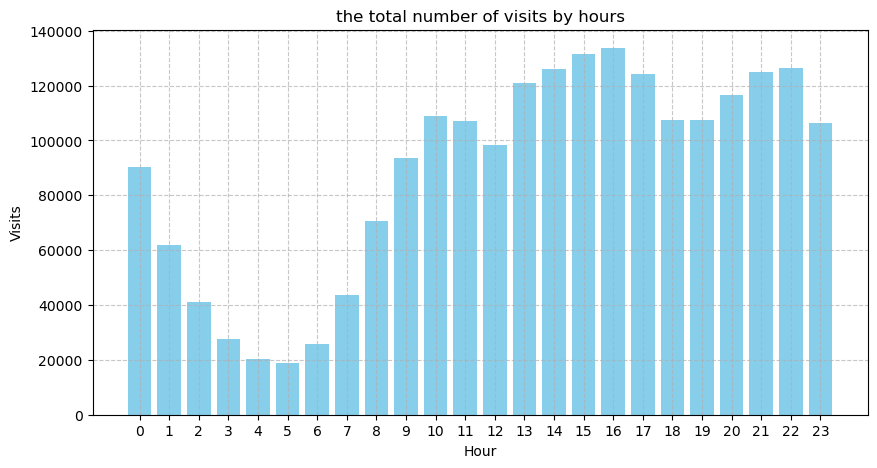

In [10]:
import pytz
import matplotlib.pyplot as plt

# 'client_event_time'을 datetime 형식으로 변환
enter_main['client_event_time'] = pd.to_datetime(enter_main['client_event_time'], errors='coerce')

# UTC → 한국 시간 (KST, UTC+9) 변환
utc = pytz.utc
kst = pytz.timezone('Asia/Seoul')

enter_main['client_event_time'] = (
    enter_main['client_event_time']
    .dt.tz_localize(utc)    # 먼저 UTC 시간대로 지정
    .dt.tz_convert(kst)     # 한국 시간(KST)으로 변환
)

# 시간대(hour) 추출
enter_main['hour'] = enter_main['client_event_time'].dt.hour

# 시간대별 방문 횟수 집계
hourly_counts = enter_main['hour'].value_counts().sort_index()

# 결과 출력
print("시간대별 방문 횟수:")
print(hourly_counts)

# 시각화 (막대 그래프)
plt.figure(figsize=(10, 5))
plt.bar(hourly_counts.index, hourly_counts.values, color='skyblue')
plt.xlabel('Hour')
plt.ylabel('Visits')
plt.title('the total number of visits by hours')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(24))
plt.show()


In [11]:
enter_main['device_family'].unique()

array(['Samsung Phone', 'Mac', 'Samsung Galaxy Note', 'Apple iPhone',
       'Samsung SM-S916N', 'Windows', 'Apple iPad',
       'Samsung Galaxy Phone', 'LGE Phone', 'Samsung SM-S911N',
       'Samsung Tablet', 'Redmi Phone', 'Xiaomi Phone', 'Linux', 'K',
       'Samsung SM-S918N', 'LG LM-X220N', 'CentOS', 'Chromium OS',
       'LG LM-V409N', 'LGM-X600K', 'LG LM-V510N', '2201117TY',
       'LG LM-V500N', 'Samsung Galaxy Tab', 'Mi 9T Pro',
       'Google Nexus Phone', 'G91', 'LG V607L', 'LG LM-G820N',
       'LG LM-G710N', 'Ubuntu', 'LG LM-Q920N', 'Huawei Phone', nan,
       'MobiGo2', 'LGM-V300S', 'LG LM-Q925L', 'LG LM-Q630N', 'LG F800L',
       'LG LM-Q520N', 'LG LM-Q510N', 'LGM-V300L', 'Lenovo TB-J706F',
       '2201116SG', 'M2101K7AG', 'Samsung SM-T825N', 'Blackberry Phone',
       'LG V525', 'LG LM-Q815K', 'LG LM-X410S', 'LG LM-Q725S',
       'LG LM-Q927L', 'LGM-V300K', 'LGM-G600S', 'LG LM-X625N',
       'Huawei M2-802L', '21051182G', 'LG LM-Q925S', 'IM-100K',
       'M2101K7BNY', 

In [14]:
device_family = enter_main['device_family'].value_counts()
device_family.head(10)

device_family
Windows                 845411
Apple iPhone            486263
Samsung Phone           234494
Mac                     233654
Android                 166296
K                        41600
Samsung Galaxy Note      30449
Samsung Galaxy Phone     26938
Apple iPad               20644
Linux                    16489
Name: count, dtype: int64

In [15]:
enter_main['platform'].value_counts()

platform
Web    2133548
Name: count, dtype: int64

# 2. enter.signup_page
- 회원가입 페이지 진입

In [4]:
enter_signup = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/enter.signup_page.csv')
enter_signup.drop(columns=['device_carrier'], inplace=True)
enter_signup.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seoul,2023-04-05 21:30:42.557000,South Korea,Samsung Phone,Samsung Galaxy A51 5G,enter.signup_page,Korean,Chrome,112.0.0.0,Web,NaN
1,Seoul,2023-04-05 21:37:41.467000,South Korea,Samsung SM-S916N,NaN,enter.signup_page,Korean,Chrome,111.0.0.0,Web,NaN
2,Seoul,2023-04-05 21:05:53.237000,South Korea,Apple iPhone,Apple iPhone,enter.signup_page,Korean,Mobile Safari,16.4,Web,NaN
3,Gangnam-gu,2023-04-05 21:41:58.269000,South Korea,Mac,Mac,enter.signup_page,Korean,Safari,16.3,Web,NaN
4,Seoul,2023-04-05 21:44:53.294000,South Korea,Mac,Mac,enter.signup_page,Korean,Safari,15.6.1,Web,NaN


# 3. complete.sign up
- 회원가입 완료

In [5]:
complete_signup = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/complete.signup.csv')
complete_signup.drop(columns=['device_carrier'], inplace=True)
complete_signup.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,type
0,NaN,2023-04-05 21:33:26.068000,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,74d17c27a41656e7788b0c81d9f76cda,kakao
1,NaN,2023-04-05 21:45:18.672000,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,06b6868000a5d576180aca47896d6cce,kakao
2,Seo-gu,2023-04-10 14:47:56.424000,South Korea,Windows,Windows,complete.signup,Korean,Chrome,111.0.0.0,Web,e131c319972bd580146c5a2faba26613,kakao
3,Suwon,2023-04-10 14:25:45.920000,South Korea,Apple iPhone,Apple iPhone,complete.signup,Korean,Mobile Safari,16.3,Web,e3b8bfa80d866f296aad139e09023ef3,naver
4,NaN,2023-04-10 14:09:50.698000,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,5208a60918f18562ac9d668a35b20303,kakao


In [18]:
complete_signup['type'].value_counts()

type
kakao       89484
google      21465
naver       19440
email       14126
facebook      442
test            1
Name: count, dtype: int64

In [19]:
complete_signup['language'].value_counts()

language
Korean        44163
English        1466
Japanese         50
Chinese          23
Vietnamese       16
French           12
Russian          12
German            7
Spanish           6
Uzbek             4
Indonesian        3
Ukrainian         1
Turkish           1
Arabic            1
Galician          1
Portuguese        1
Name: count, dtype: int64

In [21]:
signup_city = complete_signup['city'].value_counts()
signup_city.head(20)

city
Seoul              8564
Gangnam-gu         1311
Suwon              1264
Seongnam-si        1181
Yongin-si           975
Goyang-si           865
Seo-gu              814
Seocho-gu           737
Gwanak-gu           731
Incheon             711
Songpa-gu           699
Buk-gu              689
Bucheon-si          611
Dongjak-gu          598
Nam-gu              584
Yeongdeungpo-gu     553
Mapo-gu             550
Anyang-si           540
Jung-gu             534
Gangseo-gu          530
Name: count, dtype: int64

In [19]:
complete_signup['city'].unique()

array([nan, 'Seo-gu', 'Suwon', 'Eunpyeong-gu', 'Daedeok-gu', 'Songpa-gu',
       'Hwaseong-si', 'Gwanak-gu', 'Andong', 'Jungnang-gu', 'Goyang-si',
       'Pyeongtaek-si', 'Jinju', 'Buk-gu', 'Seongbuk-gu', 'Busanjin-gu',
       'Seoul', 'Yeosu', 'Gyeryong-si', 'Gangnam-gu', 'Yangcheon-gu',
       'Dalseo-gu', 'Gwangmyeong', 'Hanam', 'Incheon', 'Asan', 'Gimhae',
       'Gangbuk-gu', 'Namdong-gu', 'Seongnam-si', 'Seodaemun-gu',
       'Yeongdeungpo-gu', 'Busan', 'Geumcheon-gu', 'Seongdong-gu',
       'Yongin-si', 'Gangseo-gu', 'Gimcheon', 'Sejong', 'Ansan-si',
       'Geumjeong-gu', 'Guro-gu', 'Gangdong-gu', 'Suncheon', 'Namyangju',
       'Paju', 'Suseong-gu', 'Yuseong-gu', 'Bucheon-si', 'Icheon-si',
       'Auckland', 'Jeju City', 'Gwangmyeong-si', 'Mokpo', 'Mungyeong',
       'Uijeongbu-si', "Yangp'yong", 'Nam-gu', 'Guri-si', 'Anyang-si',
       'Kwangyang', 'Siheung-si', 'Uiwang', 'Cheongju-si', 'Seocho-gu',
       'Gwacheon-si', 'Jung-gu', 'Gunpo', 'Cheonan', 'Dongdaemun-gu',
       

# 4. enter.content_page
- 콘텐츠 개별 페이지 진입
- 가입을 안해도 개별 콘텐츠 페이지에 들어올 수 있음

In [6]:
enter_content = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/enter.content_page.csv')
enter_content.drop(columns=['device_carrier'], inplace=True)
enter_content.rename(columns={'content.id': 'content_id'}, inplace=True)
enter_content.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
0,Seoul,2023-04-05 21:40:35.740000,South Korea,Apple iPhone,Apple iPhone,enter.content_page,Korean,Chrome,108.0.5359.112,Web,d57aba7b4527e71b96135deaaec57def,220ce7873b8895d0c81c37600b5bd1e7
1,Hwaseong-si,2023-04-05 21:01:59.950000,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.content_page,Korean,Chrome,111.0.0.0,Web,NaN,ecde9a1b01763f791c3a185d53b5f394
2,Daejeon,2023-04-05 21:13:12.038000,South Korea,Windows,Windows,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,b8d4ec0133e5ce485055bfd69cd28abd
3,Daejeon,2023-04-05 21:14:25.355000,South Korea,Windows,Windows,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430
4,Seoul,2023-04-05 21:44:23.759000,South Korea,Samsung Phone,Samsung Galaxy S20 FE 5G,enter.content_page,Korean,Samsung Browser,14.2,Web,NaN,7cebec6e79cc981dbf421c5ec2aedd9d


In [ ]:
# 모바일 환경, 웹 환경 사용 비율 확인해보기
enter_content['os_name'].value_counts()

os_name
Chrome                  1311815
Edge                     172214
Mobile Safari             81828
Safari                    79381
Whale                     76407
Samsung Browser           62859
Instagram                 35221
Chrome WebView            30677
Chrome Mobile             30082
WebKit                    14381
Firefox                    7414
Facebook                   5509
GSA                        2689
Chrome Headless            1562
Opera                       865
Avast Secure Browser        396
Yandex                      297
Android Browser             179
Opera Touch                  87
MIUI Browser                 76
Electron                     61
Silk                         44
WeChat                       22
Puffin                       13
Chromium                     10
Line                          6
AVG Secure Browser            5
QQBrowser                     3
UCBrowser                     3
Maxthon                       2
Name: count, dtype: int64

In [2]:
import pandas as pd

# 5. click.content_page_start_content_button
- 콘텐츠 수강하기 버튼 클릭

In [3]:

click_start_content = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/click.content_page_start_content_button.csv')
click_start_content.drop(columns=['device_carrier'], inplace=True)
# button name 변수명 수정하기
click_start_content.rename(columns={'button_name': 'button_name_type_a', 'button.name': 'button_name_type_b','content.id': 'content_id'}, inplace=True)
click_start_content.head()

/var/folders/8n/hhsvh2bx7mvgkdpmj2shqm8c0000gn/T/ipykernel_18494/3320535343.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  click_start_content = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/click.content_page_start_content_button.csv')


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,button_name_type_b,button_name_type_a
0,Daejeon,2023-04-05 21:14:38.432000,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,콘텐츠 구독하기,NaN
1,Seongnam-si,2023-04-10 14:57:20.033000,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Edge,112.0.1722.34,Web,f7155af01d277f11b1c7d05cf772c686,18992b667be06d6f29ba0008f99d9745,콘텐츠 이어보기,NaN
2,Yangp'yong,2023-04-10 14:28:29.515000,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,111.0.0.0,Web,1b05f9fe82b80771323caa1cd5683143,dfbdae782996c25daed7517b8835f3aa,콘텐츠 이어보기,NaN
3,Seo-gu,2023-04-10 14:09:30.564000,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,112.0.0.0,Web,353528475f2bd85934263421ccd579b3,a1eeebeb6c307641b75b94a2a1d5b9aa,콘텐츠 이어보기,NaN
4,Seo-gu,2023-04-10 14:10:52.368000,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,112.0.0.0,Web,353528475f2bd85934263421ccd579b3,7de35a9d8f14c68e5f2a8788dda5f72e,콘텐츠 구독하기,NaN


In [ ]:
click_start_content button_name_type_b	button_name_type_a

In [ ]:
# 버튼 바뀌기 전 
click_start_content['button_name_type_a'].value_counts()

button_name_type_a
이어하기        23793
무료로 시작하기     6094
수강하기         5348
수강시작         3716
Name: count, dtype: int64

In [ ]:
# 버튼 바뀐 후
click_start_content['button_name_type_b'].value_counts()

button_name_type_b
콘텐츠 구독하기      40961
콘텐츠 이어보기      27797
무료로 들어보기      13596
무료로 시작하기       2513
최저가 혜택 받기       907
최저가로 시작하기       293
구독 시작하기         174
할인받고 구독 시작        1
Name: count, dtype: int64

In [53]:
# 시간대별 버튼 클릭 횟수 보기
click_start_content['client_event_time'] = pd.to_datetime(click_start_content['client_event_time'], errors='coerce')
click_start_content['month'] = click_start_content['client_event_time'].dt.to_period('M')

# 시간대별 버튼 B 클릭 횟수 집계
button_a_counts = click_start_content.groupby(['month', 'button_name_type_a']).size().unstack()

# 결과 출력
display(button_a_counts)

/var/folders/8n/hhsvh2bx7mvgkdpmj2shqm8c0000gn/T/ipykernel_20045/40442080.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  click_start_content['month'] = click_start_content['client_event_time'].dt.to_period('M')


button_name_type_a,무료로 시작하기,수강시작,수강하기,이어하기
month,,,,
2021-11,1.0,NaN,1.0,NaN
2021-12,NaN,NaN,2.0,6.0
2022-01,1041.0,465.0,852.0,4593.0
2022-02,647.0,504.0,629.0,3416.0
2022-03,1023.0,477.0,1089.0,3589.0
2022-04,1077.0,471.0,925.0,3283.0
2022-05,982.0,715.0,787.0,3698.0
2022-06,969.0,880.0,758.0,3901.0
2022-07,354.0,204.0,305.0,1307.0


In [34]:
click_start_content['client_event_time'] = pd.to_datetime(click_start_content['client_event_time'])

# 월별 데이터 만들기 (YYYY-MM 형식)
click_start_content['month'] = click_start_content['client_event_time'].dt.to_period('M')

# 월별 버튼 클릭 횟수 집계
monthly_counts = click_start_content.groupby('month')[['button_name_type_a', 'button_name_type_b']].count()

# 결과 출력
display(monthly_counts)

,button_name_type_a,button_name_type_b
month,,
2021-11,2,0
2021-12,9,0
2022-01,6965,0
2022-02,5198,0
2022-03,6206,0
2022-04,5737,0
2022-05,6174,0
2022-06,6528,0
2022-07,2132,0


In [ ]:
# 날짜별 버튼 클릭 횟수 보기
click_start_content['client_event_time'] = pd.to_datetime(click_start_content['client_event_time'], errors='coerce')
click_start_content['month'] = click_start_content['client_event_time'].dt.to_period('M')

# 날짜별 버튼 B 클릭 횟수 집계
button_b_counts = click_start_content.groupby(['month', 'button_name_type_b']).size().unstack()

# 결과 출력
display(button_b_counts)

/var/folders/8n/hhsvh2bx7mvgkdpmj2shqm8c0000gn/T/ipykernel_20045/982298370.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  click_start_content['month'] = click_start_content['client_event_time'].dt.to_period('M')


button_name_type_b,구독 시작하기,무료로 들어보기,무료로 시작하기,최저가 혜택 받기,최저가로 시작하기,콘텐츠 구독하기,콘텐츠 이어보기,할인받고 구독 시작
month,,,,,,,,
2022-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2022-12,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-01,NaN,12018.0,52.0,907.0,293.0,2826.0,3305.0,NaN
2023-02,50.0,1485.0,733.0,NaN,NaN,2039.0,2688.0,NaN
2023-03,74.0,89.0,915.0,NaN,NaN,2149.0,2641.0,NaN
2023-04,50.0,NaN,812.0,NaN,NaN,2117.0,2633.0,NaN
2023-05,NaN,3.0,NaN,NaN,NaN,7836.0,4213.0,NaN
2023-06,NaN,NaN,NaN,NaN,NaN,4570.0,1496.0,NaN
2023-07,NaN,NaN,1.0,NaN,NaN,5308.0,1632.0,NaN


In [45]:
# 시간대(hour) 추출
click_start_content['hour'] = click_start_content['client_event_time'].dt.hour

# '콘텐츠 구독하기'와 '콘텐츠 이어보기'만 선택 (필터링)
filtered = click_start_content[click_start_content['button_name_type_b'].isin(['콘텐츠 구독하기', '콘텐츠 이어보기'])]

# 시간대별 버튼 클릭 횟수 집계
button_b_counts = filtered.groupby(['hour', 'button_name_type_b']).size().unstack()

# 결과 출력
display(button_b_counts)


button_name_type_b,콘텐츠 구독하기,콘텐츠 이어보기
hour,,
0,1553,1053
1,965,499
2,669,315
3,383,258
4,291,172
5,233,169
6,323,302
7,474,459
8,896,846


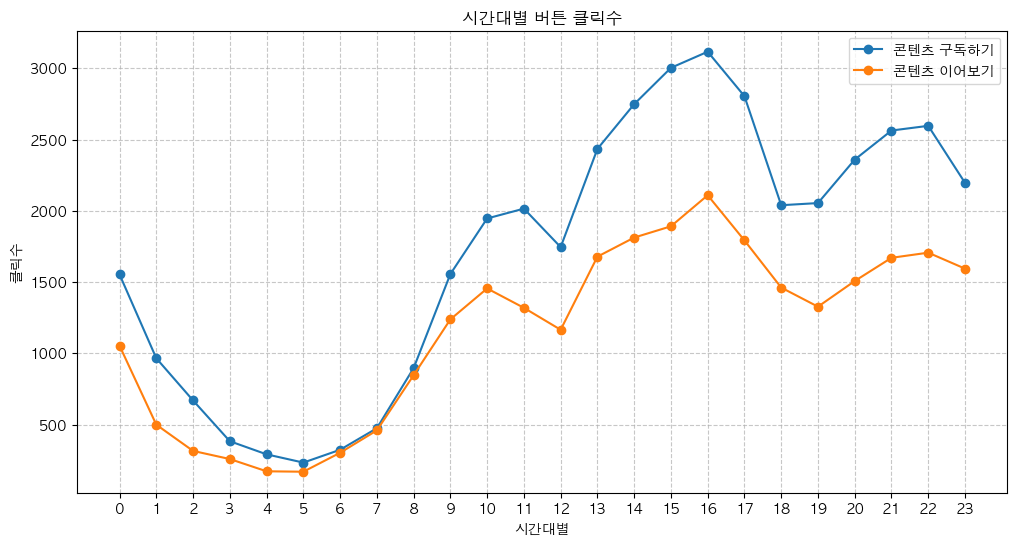

In [46]:
import matplotlib.pyplot as plt

# 그래프 그리기
plt.figure(figsize=(12, 6))

for button_type in button_b_counts.columns:
    plt.plot(button_b_counts.index, button_b_counts[button_type], label=button_type, marker='o')

# 그래프 꾸미기
plt.xlabel('시간대별')
plt.ylabel('클릭수')
plt.title('시간대별 버튼 클릭수')
plt.legend()
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()

# 6. click.content_page_more_review_button
- 콘텐츠 후기 더보기 버튼 클릭

- client_event_review_time, country, device_family, os_name, user_id, content_id

In [5]:
click_review = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/click.content_page_more_review_button.csv')
click_review.drop(columns=['device_carrier'], inplace=True)
click_review.rename(columns={'content.id': 'content_id','client_event_time':'client_event_review_time'}, inplace=True)
click_review.head()

,city,client_event_review_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
0,Seo-gu,2023-04-10 14:10:01.402000,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,558fe7e8c06b8505f11b33d76f076e56,a1eeebeb6c307641b75b94a2a1d5b9aa
1,London,2023-01-24 21:37:43.417000,United Kingdom,Windows,Windows,click.content_page_more_review_button,Korean,Whale,3.18.154.13,Web,e48956538e4df690a5d12adf1e6f2ee3,f491517f4737a60d661cd1fcacc702c0
2,Eunpyeong-gu,2023-01-31 14:44:16.897000,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,109.0.0.0,Web,e745da89019e303b122bfceac0521a8f,9aa7628a347707fb155943041e2cb524
3,Seoul,2023-01-31 14:30:36.568000,South Korea,Apple iPhone,Apple iPhone,click.content_page_more_review_button,Korean,Mobile Safari,15.6.1,Web,e2c59d444736eceee9eedba85bd4e209,f491517f4737a60d661cd1fcacc702c0
4,Seoul,2023-02-12 03:24:32.337000,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,110.0.0.0,Web,74b66b738185ffdbec960db4a0da330a,101e1d0dcc38d9c86156f008a145083e


In [50]:
user_contentid = click_review[['user_id','content.id']].value_counts()
user_contentid.head(20)

user_id                           content.id                      
17d570bd01d51cf56c1b8aaa464d32c8  db82104b9c508953b3d00eea82844a48    94
f8eedef539df7b9f3486c6ea72f02012  38df90d4de533d6296b52c6a1d90e26b    69
                                  3c3701997224d03a95fbb3b34446d238    63
17d570bd01d51cf56c1b8aaa464d32c8  ddaafc2251644873b3dcde16c5d0b9ba    51
d2c7120aabd4ece896035f58b763a2dd  289ae01387d36327c04b176c6d62a626    43
8c7c7766fa75bcd1eb4ee6230d6e0815  595cb4bbfc83e683b0314ca1312cfbde    43
60b36fcc8ac9ecbbaaad1a94d5028c20  f491517f4737a60d661cd1fcacc702c0    42
0386abdf5e2b082d78084a8e325ed4ad  f4be1a0fe0e301b03115591777fddf29    42
08752824ce1a99a08232bc5286ae8f68  b314d5aba64a0aab40602cb72a4a1504    39
d2c7120aabd4ece896035f58b763a2dd  d0bce5e5af242d6d60e16b68b4febf2e    38
45473d99d11966b8791c2a1846f99cb6  3c3701997224d03a95fbb3b34446d238    37
b7882635c4ef5b45d7de3971ea65d3cf  d6227ba76134f6cf821bb98b5f235bd0    36
c1e9803519dfa2141c2011a85f4fe657  db1819d3a7a4c4d85dccb3b

# 5,6 데이터 merge

In [6]:
# 필요한 컬럼만 선택
click_start_content_selected = click_start_content[['user_id', 'content_id','client_event_time','country', 'device_family', 'os_name']]  
click_review_selected = click_review[['user_id', 'content_id', 'client_event_review_time']]

merged_df = pd.merge(click_start_content_selected, click_review_selected, on=['user_id', 'content_id'], how='left')

# 결과 확인
display(merged_df)

,user_id,content_id,client_event_time,country,device_family,os_name,client_event_review_time
0,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,2023-04-05 21:14:38.432000,South Korea,Windows,Edge,NaN
1,f7155af01d277f11b1c7d05cf772c686,18992b667be06d6f29ba0008f99d9745,2023-04-10 14:57:20.033000,South Korea,Windows,Edge,NaN
2,1b05f9fe82b80771323caa1cd5683143,dfbdae782996c25daed7517b8835f3aa,2023-04-10 14:28:29.515000,South Korea,Windows,Chrome,NaN
3,353528475f2bd85934263421ccd579b3,a1eeebeb6c307641b75b94a2a1d5b9aa,2023-04-10 14:09:30.564000,South Korea,Windows,Chrome,NaN
4,353528475f2bd85934263421ccd579b3,7de35a9d8f14c68e5f2a8788dda5f72e,2023-04-10 14:10:52.368000,South Korea,Windows,Chrome,NaN
...,...,...,...,...,...,...,...
109620628,NaN,b314d5aba64a0aab40602cb72a4a1504,2023-10-10 05:41:43.314000,South Korea,Windows,Chrome,2023-08-02 18:08:09.866000
109620629,NaN,b314d5aba64a0aab40602cb72a4a1504,2023-10-10 05:41:43.314000,South Korea,Windows,Chrome,2023-08-15 10:12:29.396000
109620630,NaN,b314d5aba64a0aab40602cb72a4a1504,2023-10-10 05:41:43.314000,South Korea,Windows,Chrome,2023-12-19 02:06:45.302000
109620631,NaN,b314d5aba64a0aab40602cb72a4a1504,2023-10-10 05:41:43.314000,South Korea,Windows,Chrome,2023-08-05 15:37:58.488000


In [7]:
merged_df.rename(columns={'client_event_time': 'start_content_time','client_event_review_time':'review_click_time'}, inplace=True)

In [10]:
only_content_id = merged_df[merged_df['user_id'].isna() & merged_df['content_id'].notna()]
only_content_id['content_id'].nunique()

121

In [12]:
# 중복 제거 (content_id 기준)
only_content_id_filtered = only_content_id.drop_duplicates(subset=['content_id','start_content_time'])

# 결과 확인
display(only_content_id_filtered)

,user_id,content_id,start_content_time,country,device_family,os_name,review_click_time
12,NaN,61b6463287573f00de13a930805a52d6,2023-01-12 19:31:24.229000,South Korea,Samsung Galaxy Tab,Samsung Browser,2023-06-02 09:42:26.724000
136,NaN,ab7068685b7aeac4d6b1a6c0e1c85819,2023-04-12 11:15:15.570000,South Korea,Windows,Chrome,2023-01-13 06:38:48.177000
295,NaN,61b6463287573f00de13a930805a52d6,2023-01-24 21:22:27.212000,South Korea,Samsung Galaxy Note,Chrome,2023-06-02 09:42:26.724000
397,NaN,61b6463287573f00de13a930805a52d6,2023-01-24 21:27:35.185000,South Korea,Apple iPhone,Mobile Safari,2023-06-02 09:42:26.724000
499,NaN,61b6463287573f00de13a930805a52d6,2023-01-24 21:47:21.514000,South Korea,Samsung Phone,Chrome WebView,2023-06-02 09:42:26.724000
...,...,...,...,...,...,...,...
109615204,NaN,c8affa8409b8bd58d00d3477dd2b8ba5,2023-12-29 13:18:47.836000,South Korea,Windows,Edge,2023-05-19 00:48:42.977000
109615450,NaN,c269eb6df3a374b464f7c18f12fa398f,2023-10-30 00:56:40.760000,South Korea,Mac,Chrome,2023-06-29 02:10:58.638000
109617436,NaN,8a72eed73d3f9d3ab1771548070e7338,2023-10-10 05:57:01.036000,South Korea,Windows,Chrome,2023-03-02 03:37:56.128000
109617948,NaN,61b6463287573f00de13a930805a52d6,2023-10-10 05:02:56.671000,South Korea,Windows,Avast Secure Browser,2023-06-02 09:42:26.724000


In [15]:
only_content_id_filtered['content_id'].value_counts().head(10)

content_id
61b6463287573f00de13a930805a52d6    24527
f4be1a0fe0e301b03115591777fddf29     3093
c269eb6df3a374b464f7c18f12fa398f     2126
68a3658f1b936bfff3bd6960cd561b0a     1037
a914987711c7e2db9fd4bff7555ec87c      855
f491517f4737a60d661cd1fcacc702c0      758
445fac33232adcb3d1cdab7d8a579430      695
621c7ad99b17d2d16832b618d47aea7e      685
220ce7873b8895d0c81c37600b5bd1e7      615
c8affa8409b8bd58d00d3477dd2b8ba5      555
Name: count, dtype: int64

In [16]:
# 필요한 컬럼만 선택
click_start_selected = click_start_content[['content_id', 'button_name_type_b', 'button_name_type_a']]

content_ab_testing = pd.merge(only_content_id_filtered, click_start_selected, on='content_id', how='left')

display(content_ab_testing)

: 

# 7. enter.payment_page
- 결제 페이지 진입

In [9]:
enter_payment = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/enter.payment_page.csv')
enter_payment.drop(columns=['device_carrier'], inplace=True)
enter_payment.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seoul,2023-04-05 21:31:27.602000,South Korea,Samsung Phone,Samsung Galaxy A51 5G,enter.payment_page,Korean,Chrome,112.0.0.0,Web,8ee58bcaa05b234cdbf84167c0983385
1,Wonju,2023-04-05 21:33:30.699000,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,111.0.0.0,Web,74d17c27a41656e7788b0c81d9f76cda
2,Daejeon,2023-04-05 21:05:28.337000,South Korea,Windows,Windows,enter.payment_page,Korean,Edge,111.0.1661.62,Web,62cfa08370da60b8db4495baaff62806
3,Seoul,2023-04-05 21:45:27.935000,South Korea,Mac,Mac,enter.payment_page,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce
4,Seoul,2023-04-05 21:46:50.632000,South Korea,Mac,Mac,enter.payment_page,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce


In [58]:
enter_payment.isna().sum()

city                 2699
client_event_time       0
country               162
device_family           1
device_type          5995
event_type              0
language                0
os_name                 0
os_version            501
platform                0
user_id              6227
dtype: int64

In [61]:
# 'client_event_time'을 datetime 형식으로 변환
enter_payment['client_event_time'] = pd.to_datetime(enter_payment['client_event_time'], errors='coerce')

# 날짜만 추출
enter_payment['date'] = enter_payment['client_event_time'].dt.to_period('M')

# `user_id`가 NaN인 데이터만 필터링
null_user_data = enter_payment[enter_payment['user_id'].isna()]

# 날짜별 `NaN user_id` 개수 집계
null_user_counts = null_user_data.groupby('date').size()

# 결과 출력
display(null_user_counts)


date
2022-11      45
2022-12     151
2023-01     231
2023-02     963
2023-03     146
2023-04     106
2023-05     154
2023-06     327
2023-07     650
2023-08     573
2023-09     795
2023-10     889
2023-11    1032
2023-12     165
Freq: M, dtype: int64

# 8. complete.subscription
- 첫 결제 완료

In [10]:
complete_subscription = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/complete.subscription.csv')
complete_subscription.drop(columns=['device_carrier'], inplace=True)
complete_subscription.rename(columns={'pg.type': 'pg_type','plan.price':'plan_price','coupon.discout_amount':'coupon_discout_amount'}, inplace=True)
complete_subscription.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon.discount_amount,pg_type
0,Nowon-gu,2023-04-05 21:40:04.000000,South Korea,Windows,Windows,complete.subscription,Korean,Edge,111.0.1661.62,Web,1116a2ae90ca6b06f85feba27ad51ef0,15920,15920,0,NaN
1,Seoul,2023-04-10 14:20:03.008000,South Korea,Apple iPhone,Apple iPhone,complete.subscription,Korean,Mobile Safari,16.3,Web,c0f5678df8967163e6e2c464ed006791,131600,131600,0,NaN
2,Yangsan,2023-03-12 08:46:14.026000,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,79421b5d038205ad7adbb1e2c3b89741,131600,119756,11844,NaN
3,Geumjeong-gu,2023-04-12 11:35:01.865000,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,bdffe1f18684704d4ea2d7eebcaed180,131600,131600,0,NaN
4,Gwangmyeong,2023-05-31 01:25:55.820000,South Korea,Mac,Mac,complete.subscription,Korean,Chrome,113.0.0.0,Web,d4f54ecf6c4d7bf8742f80505f02d6dc,15920,15920,0,NaN


In [63]:
#결측치 확인
complete_subscription.isna().sum()

city                        532
client_event_time             0
country                     383
device_family               375
device_type                 525
event_type                    0
language                    375
os_name                     381
os_version                  390
platform                    375
user_id                       0
plan.price                    0
paid_amount                   0
coupon.discount_amount        0
pg.type                   12647
dtype: int64

In [64]:
# 날짜를 datetime 형식으로 변환
complete_subscription['client_event_time'] = pd.to_datetime(complete_subscription['client_event_time'], errors='coerce')

# 최소 및 최대 날짜 확인
min_date = complete_subscription['client_event_time'].min()
max_date = complete_subscription['client_event_time'].max()

print(f"최소 날짜: {min_date}")
print(f"최대 날짜: {max_date}")

# 이상치 찾기
outliers_date = complete_subscription[
    (complete_subscription['client_event_time'] < '2000-01-01') | 
    (complete_subscription['client_event_time'] > '2024-01-01')
]

# 결과 출력
print("날짜 이상치:")
print(outliers_date)

최소 날짜: 2022-01-01 06:17:24.513000
최대 날짜: 2023-12-31 16:27:37.370000
날짜 이상치:
Empty DataFrame
Columns: [city, client_event_time, country, device_family, device_type, event_type, language, os_name, os_version, platform, user_id, plan.price, paid_amount, coupon.discount_amount, pg.type]
Index: []


In [67]:
complete_subscription['pg.type'].value_counts()

pg.type
A    1029
B     613
Name: count, dtype: int64

In [70]:
# 시간대별 버튼 클릭 횟수 보기
complete_subscription['client_event_time'] = pd.to_datetime(complete_subscription['client_event_time'], errors='coerce')
complete_subscription['month'] = complete_subscription['client_event_time'].dt.to_period('M')

# 날짜별 간편결제 건수
pg_counts = complete_subscription.groupby(['month', 'pg.type']).size().unstack()

# 결과 출력
display(pg_counts)

pg.type,A,B
month,,
2023-10,53.0,NaN
2023-11,476.0,105.0
2023-12,500.0,508.0


In [77]:
complete_subscription['plan.price'].unique()

array([ 15920, 131600,  95200,  91200,  87200,  83200,  19920,  14328,
        42960, 118440,  79200,  95520])

In [78]:
complete_subscription['plan.price'].value_counts()

plan.price
15920     7704
131600    1892
79200     1217
42960     1130
95520      870
83200      563
95200      346
87200      336
91200      221
14328        7
118440       2
19920        1
Name: count, dtype: int64

In [83]:
# 쿠폰 할인율 계산하기

complete_subscription['coupon_discount_rate'] = (
    (complete_subscription['coupon.discount_amount'] / complete_subscription['plan.price']) * 100
).round(2)

filtered_discounts = complete_subscription.dropna(subset=['coupon.discount_amount'])

display(complete_subscription[['month','plan.price', 'paid_amount', 
                          'coupon.discount_amount', 
                          'coupon_discount_rate']])

,month,plan.price,paid_amount,coupon.discount_amount,coupon_discount_rate
0,2023-04,15920,15920,0,0.0
1,2023-04,131600,131600,0,0.0
2,2023-03,131600,119756,11844,9.0
3,2023-04,131600,131600,0,0.0
4,2023-05,15920,15920,0,0.0
...,...,...,...,...,...
14284,2023-12,95520,95520,0,0.0
14285,2023-12,95520,95520,0,0.0
14286,2023-12,95520,95520,0,0.0
14287,2023-10,131600,131600,0,0.0


In [84]:
complete_subscription['coupon_discount_rate'] = (
    (complete_subscription['coupon.discount_amount'] / complete_subscription['plan.price']) * 100
).round(2)

complete_subscription['coupon_discount_rate'].value_counts()

coupon_discount_rate
0.00     11364
15.00     1253
75.13      793
20.00      336
10.00      313
25.00      110
3.00        31
40.00       23
50.00       18
2.09        17
5.00        13
9.00         8
7.00         6
4.59         2
37.69        1
30.00        1
Name: count, dtype: int64

In [85]:
complete_subscription['coupon_discount_rate'].unique()

array([ 0.  ,  9.  , 10.  , 40.  ,  5.  ,  3.  , 20.  , 50.  ,  4.59,
       75.13, 15.  , 25.  ,  7.  , 37.69, 30.  ,  2.09])

In [74]:
# 날짜별 첫 결제 확인해보기
complete_subscription['client_event_time'] = pd.to_datetime(complete_subscription['client_event_time'], errors='coerce')
complete_subscription['month'] = complete_subscription['client_event_time'].dt.to_period('M')

first_payment = complete_subscription.groupby(['month', 'plan.price']).size().unstack()

# 결과 출력
display(first_payment)

plan.price,14328,15920,19920,42960,79200,83200,87200,91200,95200,95520,118440,131600
month,,,,,,,,,,,,
2022-01,NaN,22.0,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
2022-02,NaN,310.0,NaN,132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0
2022-03,NaN,403.0,NaN,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0
2022-04,NaN,319.0,NaN,134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0
2022-05,NaN,364.0,NaN,171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0
2022-06,NaN,340.0,NaN,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0
2022-07,NaN,431.0,NaN,173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.0
2022-08,NaN,234.0,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0
2022-09,NaN,188.0,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0


# 9. renew.subscription
- 정기 결제 완료

In [11]:
renew_subscription = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/renew.subscription.csv')
renew_subscription.drop(columns=['device_carrier'], inplace=True)
renew_subscription.rename(columns={'pg.type': 'pg_type','plan.price':'plan_price','coupon.discout_amount':'coupon_discout_amount'}, inplace=True)
renew_subscription.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon.discount_amount,pg_type
0,Nam-gu,2022-09-08 03:05:02.068,South Korea,Windows,Windows,renew.subscription,Korean,Edge,104,Web,6ddea3af2eaae869861c1190dcc9d4a3,15920,15920,0,NaN
1,Nam-gu,2022-09-08 03:40:02.050,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,c2d47034960fdff5df495822ff66fbc1,15920,15920,0,NaN
2,Dongjak-gu,2022-09-08 03:49:00.829,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,de91f1226dd938990fefc79545daf468,42960,40812,2148,NaN
3,Yongin-si,2022-09-08 04:10:06.406,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,bf14840a8cb4643e6d557da96e35a3af,15920,15920,0,NaN
4,Dongjak-gu,2022-09-08 04:40:01.895,South Korea,Android,Android,renew.subscription,Korean,Chrome Mobile,103,Web,7ddc1c2990d0645d82885394e3c518b5,15920,15920,0,NaN


In [71]:
# 시간대별 버튼 클릭 횟수 보기
renew_subscription['client_event_time'] = pd.to_datetime(renew_subscription['client_event_time'], errors='coerce')
renew_subscription['month'] = renew_subscription['client_event_time'].dt.to_period('M')

# 날짜별 간편결제 건수
pg_counts = renew_subscription.groupby(['month', 'pg.type']).size().unstack()

# 결과 출력
display(pg_counts)

pg.type,A,B,C
month,,,
2023-10,136.0,NaN,5.0
2023-11,973.0,10.0,21.0
2023-12,1470.0,94.0,23.0


# 10. resubscribe.subscription
- 만료 후 재구독 완료

In [12]:
resubscribe_subscription = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/resubscribe.subscription.csv')
resubscribe_subscription.drop(columns=['device_carrier'], inplace = True)
resubscribe_subscription.rename(columns={'pg.type': 'pg_type','plan.price':'plan_price','coupon.discout_amount':'coupon_discout_amount'}, inplace=True)
resubscribe_subscription.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon.discount_amount,pg_type
0,Daejeon,2023-04-05 21:11:45.525,South Korea,Windows,Windows,resubscribe.subscription,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,15920,15920,0,NaN
1,Seoul,2023-06-30 09:59:56.848,South Korea,Samsung Phone,Samsung Galaxy S22+,resubscribe.subscription,Korean,Chrome WebView,113.0.5672.162,Web,68831c27e47f0e8f04ba809baeec218e,15920,15920,0,NaN
2,Nowon-gu,2023-06-13 06:20:22.524,South Korea,Windows,Windows,resubscribe.subscription,Korean,Chrome,114.0.0.0,Web,4e7568cb7db01f8386614ec2c6c961cd,15920,15920,0,NaN
3,Suwon,2023-06-11 11:02:11.878,South Korea,Windows,Windows,resubscribe.subscription,Korean,Chrome,114.0.0.0,Web,f91f19527b9ec688e028ec884b1b5c1c,131600,131600,0,NaN
4,Koishikawa,2023-06-13 14:39:25.736,Japan,Apple iPhone,Apple iPhone,resubscribe.subscription,Japanese,Chrome,114.0.5735.99,Web,2276d7d2a31e05f4a5558c6406cc36c9,131600,131600,0,NaN


In [72]:
# 시간대별 버튼 클릭 횟수 보기
resubscribe_subscription['client_event_time'] = pd.to_datetime(resubscribe_subscription['client_event_time'], errors='coerce')
resubscribe_subscription['month'] = resubscribe_subscription['client_event_time'].dt.to_period('M')

# 날짜별 간편결제 건수
pg_counts = resubscribe_subscription.groupby(['month', 'pg.type']).size().unstack()

# 결과 출력
display(pg_counts)

pg.type,A,B
month,,
2023-10,6.0,NaN
2023-11,60.0,3.0
2023-12,57.0,47.0


# 11. start.free_trial
- 서비스 무료체험 시작

In [13]:
start_free_trial = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/start.free_trial.csv')
start_free_trial.drop(columns=['device_carrier'], inplace = True)
start_free_trial.rename(columns={'trial.type': 'trial_type','plan.price':'plan_price','plan.type':'plan_type'}, inplace=True)
start_free_trial.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,plan_type,trial_type
0,Seoul,2023-04-05 21:49:36.156000,South Korea,Mac,Mac,start.free_trial,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,15920.0,1개월 플랜,B
1,Dobong-gu,2023-03-12 08:28:29.384000,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,110.0.0.0,Web,40acc1ddfc012f3d2f58a3de95e9e748,15920.0,1개월 플랜,B
2,NaN,2023-03-12 08:35:00.107000,NaN,NaN,NaN,start.free_trial,NaN,NaN,NaN,NaN,38aca03fba9753a6b2f31b829fb16a30,15920.0,1개월 플랜,B
3,Seoul,2023-04-12 11:36:50.250000,South Korea,Mac,Mac,start.free_trial,Korean,Safari,15.1,Web,cc8051a75f62278b0e4216dd0a182d8c,15920.0,1개월 플랜,B
4,NaN,2023-02-18 04:13:20.822000,NaN,NaN,NaN,start.free_trial,NaN,NaN,NaN,NaN,4cc436ad294973993ccad3e3a70053a7,131600.0,12개월 플랜,B


In [87]:
start_free_trial['plan.type'].value_counts()

plan.type
1개월 플랜     1278
12개월 플랜    1161
Name: count, dtype: int64

In [88]:
start_free_trial['user_id'].nunique()

16309

In [10]:
start_free_trial['user_id'].isna().sum()

14

In [89]:
start_free_trial['trial.type'].value_counts()

trial.type
A    28182
B     2439
Name: count, dtype: int64

In [90]:
#각 날짜별 trial type 보기
start_free_trial['client_event_time'] = pd.to_datetime(start_free_trial['client_event_time'])

monthly_trial = (
    start_free_trial
    .groupby([start_free_trial['client_event_time'].dt.to_period('M'), 'trial.type'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

display(monthly_trial)

trial.type,client_event_time,A,B
0,2021-12,5,0
1,2022-01,4706,0
2,2022-02,3021,0
3,2022-03,4187,0
4,2022-04,4117,0
5,2022-05,4763,0
6,2022-06,4753,0
7,2022-07,1469,0
8,2022-08,304,0
9,2022-09,372,0


# 12. start.content
- 콘텐츠 수강 시작

In [14]:
start_content = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/start.content.csv')
start_content.drop(columns=['device_carrier'], inplace = True)
start_content.rename(columns={'content.id': 'content_id', 'content.difficulty': 'content_difficulty'}, inplace=True)
start_content.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,content_difficulty
0,Daejeon,2023-04-05 21:14:39.906000,South Korea,Windows,Windows,start.content,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,beginner
1,Seoul,2023-04-05 21:50:19.674000,South Korea,Mac,Mac,start.content,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,f4be1a0fe0e301b03115591777fddf29,beginner
2,Seoul,2023-04-10 14:06:26.585000,South Korea,Mac,Mac,start.content,Korean,Whale,3.19.166.16,Web,7b2ff3116db46b5e4326d49c7b027631,61b6463287573f00de13a930805a52d6,beginner
3,Toronto,2023-04-10 14:15:29.040000,Canada,Windows,Windows,start.content,English,Chrome,111.0.0.0,Web,eb7515590646ead796fdfb54e2729240,61b6463287573f00de13a930805a52d6,beginner
4,Seoul,2023-04-10 14:21:36.467000,South Korea,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,18992b667be06d6f29ba0008f99d9745,advanced


In [92]:
start_content['content.difficulty'].value_counts()

content.difficulty
beginner        58628
intermediate    36109
advanced        27485
hard             2695
Name: count, dtype: int64

In [93]:
content_level_count = start_content[['user_id','content.difficulty']].value_counts()
content_level_count.head(20)

user_id                           content.difficulty
f59e4102149edeb73cb33ccecf95dcd9  advanced              48
cc180eef3ffd3497eb8a575165bab389  advanced              45
28068259a009cf16d0e19ae1896b1f22  advanced              43
caec8b3be818f1408e0d47d89acc245f  advanced              37
d4ab482f7d12adb21f6e9b1c68367d17  advanced              36
40504dbd203dd148d1801171d04ceb5d  advanced              34
6421bf3808b89da97f316eac07da2b91  advanced              34
5c0fe6d9885212ba763dea44677ad037  advanced              32
53141e48b97505b9f1d5ae210967b8ee  advanced              32
6ffc35355c182a39e4e3739a8df0fed4  advanced              31
61ae68a40e1d1aadc79dc6a41825c923  advanced              31
63518a68900f95baa9d76fb444a4e183  advanced              31
85ac0cd1c2a7fa2939df3061ec822eb1  advanced              31
0ea2cadbe7c50ef5c0fd22aa1a800bea  advanced              31
9e50bb9740e9dcc09b04e952e8934504  advanced              30
b53ed38fbc92e9d582322a00b5716995  advanced              29
5b7

# 13. enter.lesson_page
- 레슨 시작
- is_free_trial: 무료 공개 레슨에 대한 진입 여부. 특정 기준 시점 사용 x
- is_trial: 무료 공개 레슨에 대한 진입이면서 그 유저가 현재 구독하지 않은 회원인지 여부

In [15]:
enter_lesson = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/enter.lesson_page.csv')
enter_lesson.drop(columns=['device_carrier'], inplace = True)
enter_lesson.rename(columns={'content.id': 'content_id', 'lesson.id': 'lesson_id'}, inplace=True)
enter_lesson.head()

/var/folders/8n/hhsvh2bx7mvgkdpmj2shqm8c0000gn/T/ipykernel_1037/3907151809.py:1: DtypeWarning: Columns (9,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  enter_lesson = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/enter.lesson_page.csv')


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,is_trial,lesson_id,is_free_trial
0,Wonju,2023-04-05 21:46:04.333000,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
1,Wonju,2023-04-05 21:55:50.787000,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
2,Wonju,2023-04-05 21:55:55.684000,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN
3,Dongdaemun-gu,2023-04-05 21:04:55.828000,South Korea,Mac,Mac,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4,5fc64d786416b980cfda86afd69e4516,False,68cc362ca81b5899b3c9b4dea0aaddff,NaN
4,Dongdaemun-gu,2023-04-05 21:05:34.139000,South Korea,Mac,Mac,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4,db43a841c994231e2795d4df8931af50,False,144682f4648f81de8e6aabd11b92105e,NaN


In [99]:
enter_lesson['is_free_trial'].value_counts()
# False 값 개수 세기
false_count = (enter_lesson['is_free_trial'] == False).sum()
# True 값 개수 세기
true_count = (enter_lesson['is_free_trial'] == True).sum()

# 2) 출력
print(f"무료 공개 레슨에 대한 진입이 아닌 유저 : {false_count}명")
print(f"무료 공개 레슨에 대한 진입 유저 : {true_count}명")

무료 공개 레슨에 대한 진입이 아닌 유저 : 2154743명
무료 공개 레슨에 대한 진입 유저 : 69015명


In [ ]:
enter_lesson['is_trial'].value_counts()
# False 값 개수 세기
false_count = (enter_lesson['is_trial'] == False).sum()
# True 값 개수 세기
true_count = (enter_lesson['is_trial'] == True).sum()

# 출력
print(f"무료 공개 에피소드에 대한 진입, 구독하지 않은 회원 수 : {true_count}명")
print(f"무료 공개 에피소드에 대한 진입, 구독한 회원 수 : {false_count}명")

무료 공개 에피소드에 대한 진입, 구독하지 않은 회원 수 : 105735명
무료 공개 에피소드에 대한 진입, 구독한 회원 수 : 13549952명


# 14. complete.lesson
- 레슨 완료

In [16]:
complete_lesson = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/complete.lesson.csv')
complete_lesson.drop(columns=['device_carrier'], inplace=True)
complete_lesson.rename(columns={'content.id': 'content_id', 'lesson.id': 'lesson_id'}, inplace=True)
complete_lesson.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,lesson_id
0,Wonju,2023-04-05 21:55:51.836000,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,d360d68b65fd3e0eafb7982386d75fd9
1,Daejeon,2023-04-05 21:19:01.243000,South Korea,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,7e0f6aae886368ef9fa97007a8e9f7ac
2,Daejeon,2023-04-05 21:20:27.939000,South Korea,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,d1e93c9dc08267efab31849bc6083854
3,Daejeon,2023-04-05 21:23:01.534000,South Korea,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,f22ea5dc431035305e705552bbc4f45b
4,Daejeon,2023-04-05 21:28:34.965000,South Korea,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,ce0bfeb7fb1259c588f437d48ab2690c


# 15. click.lesson_page_related_question_box
- 레슨 페이지 내 질문 목록 클릭

In [17]:
lesson_comment = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/click.lesson_page_related_question_box.csv')
lesson_comment.drop(columns=['device_carrier'], inplace = True)
lesson_comment.rename(columns={'content.id': 'content_id', 'lesson.id': 'lesson_id','question.id':'question_id'}, inplace=True)
lesson_comment.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,question_id,content_id,lesson_id
0,Dong-gu,2023-04-05 21:51:48.377000,South Korea,Samsung Phone,Samsung Galaxy S21 5G,click.lesson_page_related_question_box,English,Chrome,111.0.0.0,Web,117f95e12266dcf8f911ae39ff55a800,c654f9825245640595af9b8aecb150aa,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
1,Dong-gu,2023-04-05 21:52:21.689000,South Korea,Samsung Phone,Samsung Galaxy S21 5G,click.lesson_page_related_question_box,English,Chrome,111.0.0.0,Web,117f95e12266dcf8f911ae39ff55a800,898fb79fc740dc8705b52fb32521d5d5,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
2,Dong-gu,2023-04-05 21:52:42.481000,South Korea,Samsung Phone,Samsung Galaxy S21 5G,click.lesson_page_related_question_box,English,Chrome,111.0.0.0,Web,117f95e12266dcf8f911ae39ff55a800,9fb80c124d57fd31494738e0af5437a3,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
3,Goyang-si,2023-04-05 21:20:15.032000,South Korea,Mac,Mac,click.lesson_page_related_question_box,Korean,Chrome,111.0.0.0,Web,e1f3ecae035a3c8ae8cf789fbde98995,9016e2246486e852992ccd9ae0eb27ca,c269eb6df3a374b464f7c18f12fa398f,395bdf0293b24ec47d5a9e960574f851
4,Goyang-si,2023-04-05 21:21:55.275000,South Korea,Mac,Mac,click.lesson_page_related_question_box,Korean,Chrome,111.0.0.0,Web,e1f3ecae035a3c8ae8cf789fbde98995,4ecd552eeded70b3274b8edf3ecacbd9,c269eb6df3a374b464f7c18f12fa398f,a738c7835388066e2618af1e5ebacb3c


# 16. end.content
- 콘텐츠 수강 완료

In [18]:
end_content = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/end.content.csv')
end_content.drop(columns=['device_carrier'], inplace=True)
end_content.rename(columns={'content.id':'content_id'})
end_content.head()

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content.id
0,Yokohama,2023-04-10 14:02:10.600000,Japan,Windows,Windows,end.content,Japanese,Chrome,111.0.0.0,Web,3fd801c6192296cf7b85efc01bd547b9,a914987711c7e2db9fd4bff7555ec87c
1,Seoul,2023-04-10 14:21:26.466000,South Korea,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,f64c475280676531a31f2f8e0648599c
2,Seongbuk-gu,2023-04-10 14:37:04.440000,South Korea,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,2bf8cb1d9c5d4556f5165c2aaf804f2e,7fef928cdccef0185dfb931ef59b37d7
3,Seo-gu,2023-04-10 14:37:19.909000,South Korea,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,831813f54c0d55c17db612f0ea311c93,68a3658f1b936bfff3bd6960cd561b0a
4,Seo-gu,2023-04-10 14:08:58.968000,South Korea,Windows,Windows,end.content,Korean,Chrome,112.0.0.0,Web,353528475f2bd85934263421ccd579b3,a1eeebeb6c307641b75b94a2a1d5b9aa


# 17. click.cancel_plan_button
- 구독 취소 버튼 클릭

In [19]:
click_cancel = pd.read_csv('/Users/haein/Desktop/코드잇-데이터분석/중급 프로젝트/주제 2/click.cancel_plan_button.csv')
click_cancel.drop(columns=['device_carrier'], inplace = True)
click_cancel.head()


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Daegu,2023-04-10 14:57:48.556,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,111.0.0.0,Web,9e59ecf9a8fbe9051bd0d54f4b702f30
1,Seoul,2023-03-12 08:26:16.224,South Korea,Apple iPad,Apple iPad,click.cancel_plan_button,English,Mobile Safari,16.3,Web,4ed4d8f12c45504a148bfff0f2e9466e
2,Uijeongbu-si,2023-03-12 08:23:04.955,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,110.0.0.0,Web,b6a1bba3cc4139d7dc821561319221e6
3,Dobong-gu,2023-03-12 08:32:39.271,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,110.0.0.0,Web,40acc1ddfc012f3d2f58a3de95e9e748
4,Geumjeong-gu,2023-04-12 11:36:28.311,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,111.0.0.0,Web,bdffe1f18684704d4ea2d7eebcaed180
